In [1]:
cd ../

/home/wakaizumi/program/M1/道路ネットワーク


In [2]:
#基本ライブラリ
import csv
import math
import random
import numpy as np
import numpy.random as random
import pandas as pd
from pandas import Series,DataFrame
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import japanize_matplotlib
#地図描画
import folium
import networkx as nx
from IPython.display import SVG, display
import collections
import seaborn as sns
#Bokehを利用
import datetime
import bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import HoverTool
from bokeh.palettes import Pastel1_3    # カラーパレット
from bokeh.transform import factor_cmap # 
from bokeh.io import output_notebook, push_notebook, export_png
import ipywidgets as widgets
#その他
import copy
import pickle
import statistics
import sys
#自作ライブラリ
from def1 import *
from def2 import *
from def3 import *
from agent2 import *
%matplotlib inline
%precision 6

/home/wakaizumi/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)
/home/wakaizumi/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


'%.6f'

In [3]:
node_df = pd.read_csv('/home/wakaizumi/data/opendataTokyo/mapdata/東京駅周辺/node.csv')
link_df = pd.read_csv('/home/wakaizumi/data/opendataTokyo/mapdata/東京駅周辺/link.csv')
node_df['name'] = 'node'
#特殊なポイント
station1 = 1910;station2 = 2416;station3 = 2597;station4 = 1620;station5 = 1791;
station = [station1,station2,station3,station4,station5]
node_df.at[station1,'name'] = '大手町駅'
node_df.at[station2,'name'] = '東京駅左下'
node_df.at[station3,'name'] = '東京駅左上'
node_df.at[station4,'name'] = '日比谷駅'
node_df.at[station5,'name'] = '有楽町駅'
#データフレームの整形
node_df_modi(node_df,link_df)
link_df_modi(node_df,link_df)
#グラフの作成
weighted_elist = []
p = {}
for i in range(len(link_df)):
    node_s,node_e = link_node(node_df,link_df,i)
    link_taple = (node_s,node_e,link_df.distance[i])
    weighted_elist.append(link_taple)
for i in range(len(node_df)):
    p.setdefault(i,(node_df.lat[i],node_df.lon[i]))

G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

np.random.seed(0)
field = Field(G,node_df,link_df)
time = 0

In [4]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
japanize_matplotlib.japanize() 

Text(0,0.5,'平均人口密度[人/m^2]')

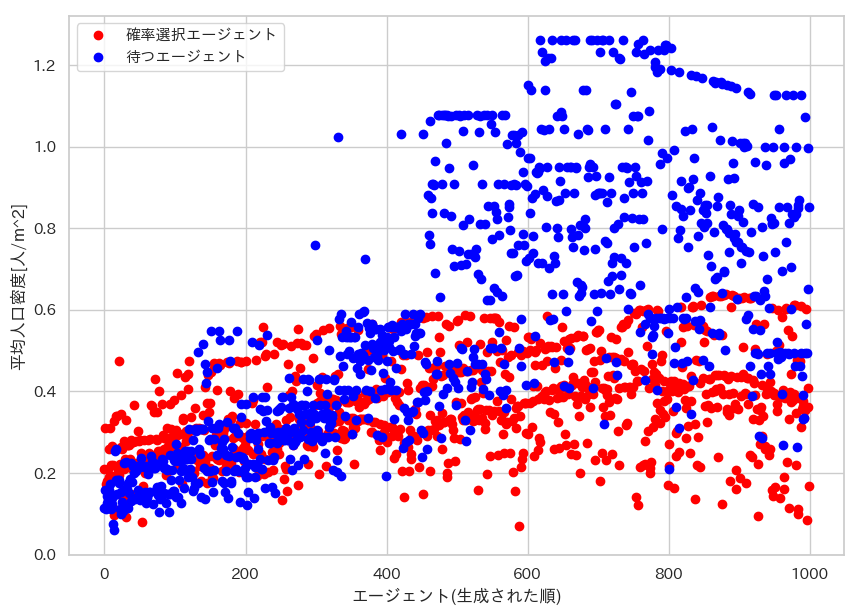

In [5]:
dens1 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/dens1.pickle')#一般人
dens2 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/dens2.pickle')#待つ通常
x = range(1000)
plt.figure(figsize=(10, 7))
plt.plot(x, dens1, marker = "o", color = "red",linestyle = "", label = '確率選択エージェント')
plt.plot(x, dens2, marker = "o",color = "blue", linestyle = "", label='待つエージェント')
plt.legend(loc = 'upper left')
plt.xlabel("エージェント(生成された順)")
plt.ylabel("平均人口密度[人/m^2]")

Text(0,0.5,'高密度(0.5以上)累積時間')

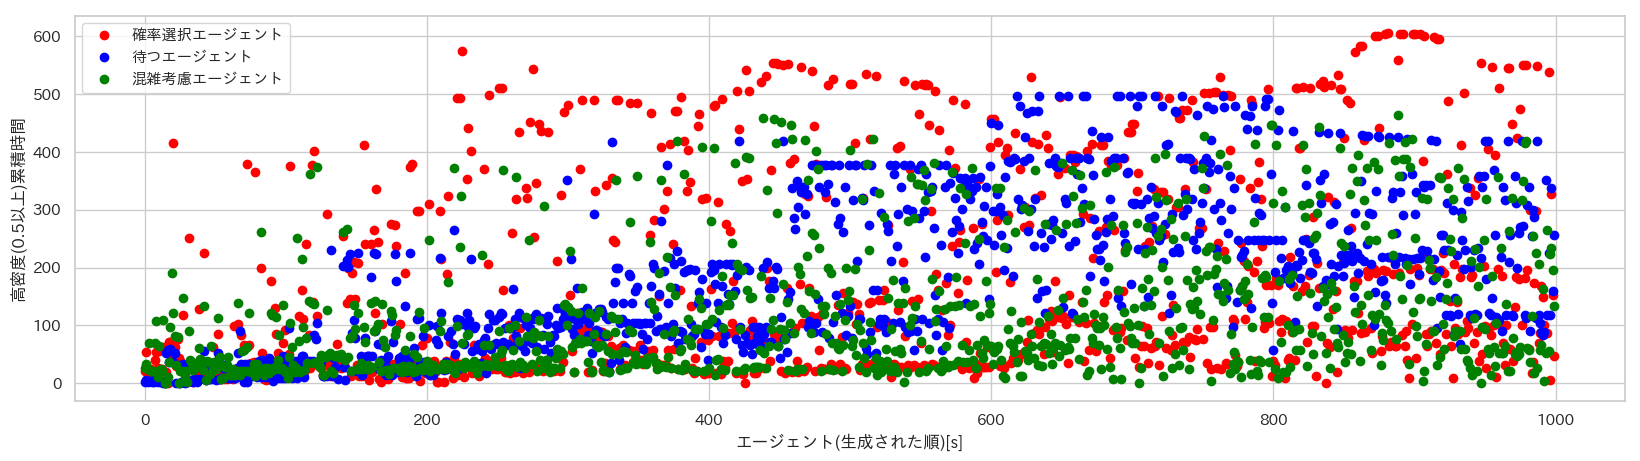

In [13]:
high_dens1 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/high_dens1.pickle')#一般人
high_dens2 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/high_dens2.pickle')
high_dens3 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/high_dens4.pickle')

x = range(1000)
plt.figure(figsize=(20, 5))
plt.plot(x, high_dens1, marker = "o", color = "red",linestyle = "", label = '確率選択エージェント')
plt.plot(x, high_dens2, marker = "o",color = "blue", linestyle = "", label = '待つエージェント')
plt.plot(x, high_dens3, marker = "o",color = "green", linestyle = "", label = '混雑考慮エージェント')
plt.legend(loc = 'upper left')
plt.xlabel("エージェント(生成された順)[s]")
plt.ylabel("高密度(0.5以上)累積時間")

In [7]:
box200 = high_dens1[0:200]
box400 = high_dens1[200:400]
box600 = high_dens1[400:600]
box800 = high_dens1[600:800]
box1000 = high_dens1[800:1000]
data1 = [box200,box400,box600,box800,box1000]

box200 = high_dens2[0:200]
box400 = high_dens2[200:400]
box600 = high_dens2[400:600]
box800 = high_dens2[600:800]
box1000 = high_dens2[800:1000]
data2 = [box200,box400,box600,box800,box1000]

box200 = high_dens3[0:200]
box400 = high_dens3[200:400]
box600 = high_dens3[400:600]
box800 = high_dens3[600:800]
box1000 = high_dens3[800:1000]
data3 = [box200,box400,box600,box800,box1000]


labels = ['0-200', '200-400', '400-600', '600-800', '800-1000']
box_data = []
for index1,label in enumerate(labels):
    for index2,value1 in enumerate(data1[index1]):
        if value1:
            box_data.append([label,value1,"確率選択エージェント"])
    for index3,value2 in enumerate(data2[index1]):
        if value2:
            box_data.append([label,value2,"待つエージェント"])
    for index4,value3 in enumerate(data3[index1]):
        if value3:
            box_data.append([label,value3,"混雑考慮エージェント"])
        
box_df = pd.DataFrame(box_data,columns=['区間','高密度(0.5以上)累積時間[s]','エージェントの種類'])

<Figure size 2000x800 with 0 Axes>

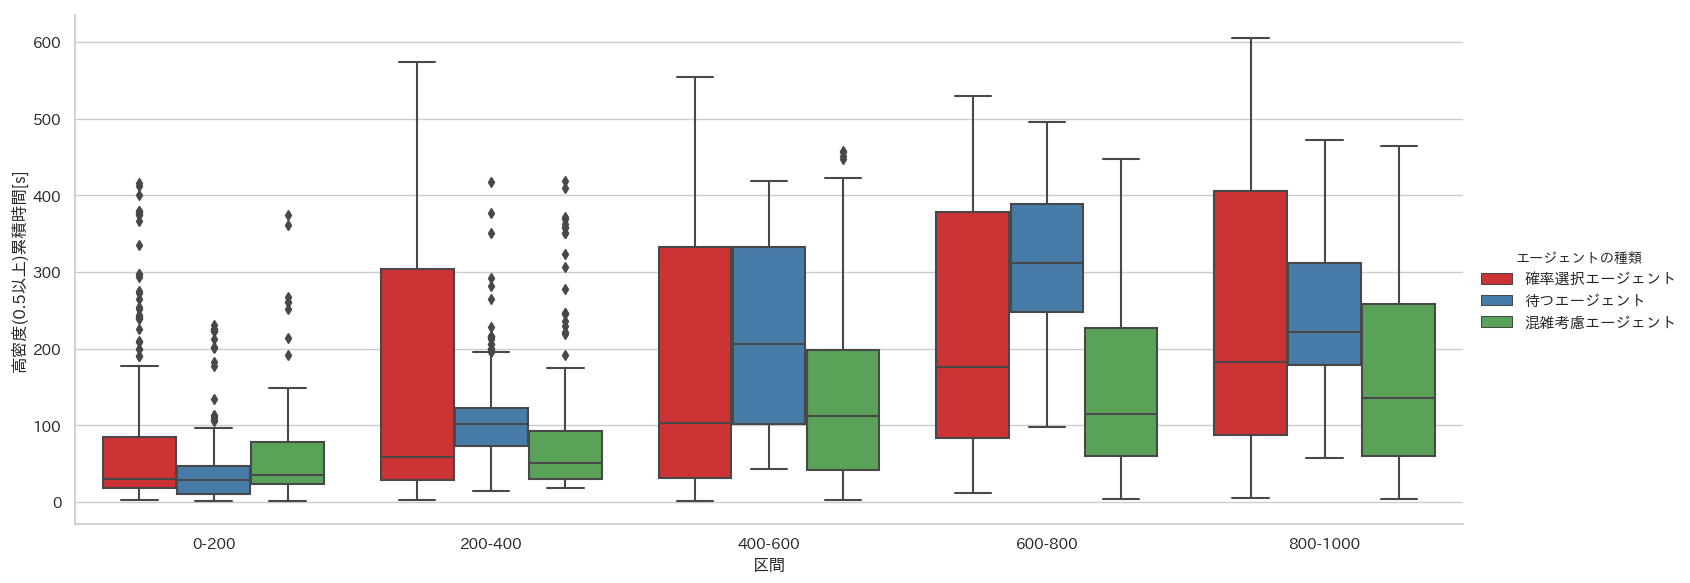

In [23]:
plt.figure(figsize=(20, 8))
ax = sns.catplot(x = '区間',y = '高密度(0.5以上)累積時間[s]',hue = 'エージェントの種類',kind = 'box',data = box_df,height=6, aspect=2.5)
plt.show()

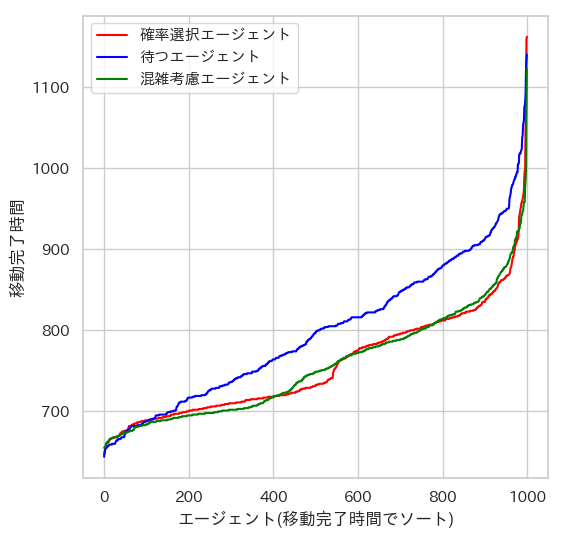

In [9]:
#時間のグラフの作成
dens1 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time1.pickle')#一般人
dens2 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time2.pickle')#待つ通常
dens3 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time3.pickle')#スピードベース
dens4 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time4.pickle')#スピードベース

x = range(1000)
plt.figure(figsize=(6, 6))
plt.plot(x, dens1, color = "red",linestyle = "-", label = '確率選択エージェント')
plt.plot(x, dens2, color = "blue", linestyle = "-", label = '待つエージェント')
plt.plot(x, dens4, color = "green", linestyle = "-", label = '混雑考慮エージェント')
plt.legend(loc = 'upper left')
plt.xlabel("エージェント(移動完了時間でソート)")
plt.ylabel("移動完了時間")

plt.show()

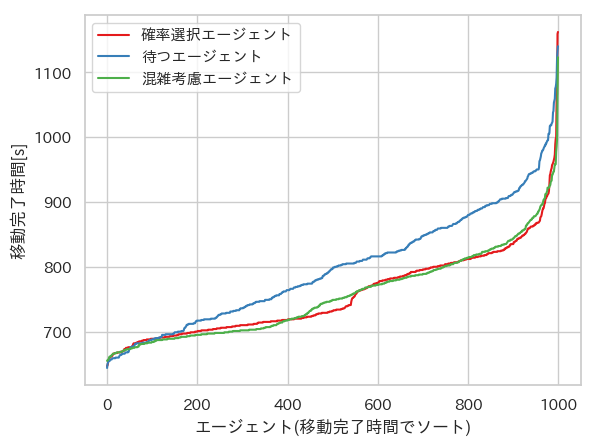

In [10]:
#人口密度のグラフの作成
dens1 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time1.pickle')#一般人
dens2 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time2.pickle')#待つ通常
dens3 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time3.pickle')#スピードベース
dens4 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time4.pickle')#スピードベース
dens5 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/15/time4.pickle')#待つスタート改良
    
x = range(1000)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, dens1, label= '確率選択エージェント')
ax.plot(x, dens2, label='待つエージェント')
#ax.plot(x, dens3, label='speed')
ax.plot(x, dens4, label='混雑考慮エージェント')

ax.legend()
ax.set_xlabel("エージェント(移動完了時間でソート)")
ax.set_ylabel("移動完了時間[s]")
#ax.set_ylim(0, 1.7)

plt.show()

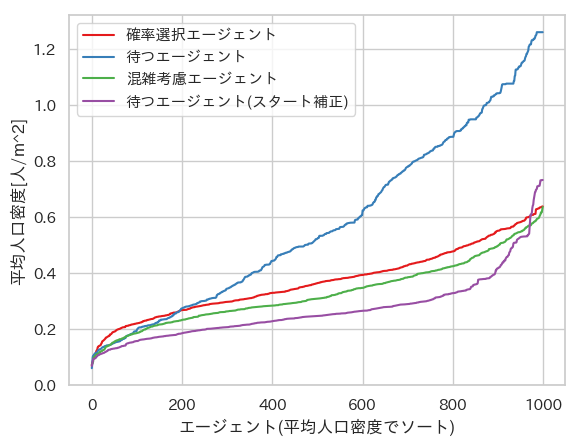

In [11]:
#人口密度のグラフの作成
dens1 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/dens_sort1.pickle')#一般人
dens2 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/dens_sort2.pickle')#待つ通常
#dens3 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/dens_sort3.pickle')#スピードベース
dens4 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/dens_sort4.pickle')#スピードベース
dens5 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/15/dens_sort4.pickle')#待つスタート改良
    
x = range(1000)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, dens1, label= '確率選択エージェント')
ax.plot(x, dens2, label='待つエージェント')
#ax.plot(x, dens3, label='speed')
ax.plot(x, dens4, label='混雑考慮エージェント')
ax.plot(x, dens5, label='待つエージェント(スタート補正)')

ax.legend()
ax.set_xlabel("エージェント(平均人口密度でソート)")
ax.set_ylabel("平均人口密度[人/m^2]")
#ax.set_ylim(0, 1.7)

plt.show()

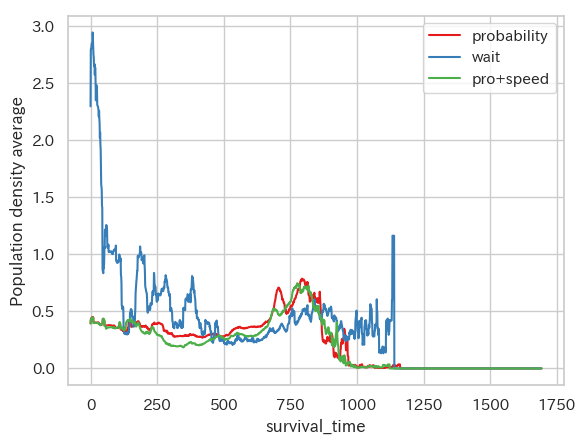

In [12]:
#時間のグラフの作成
dens1 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time_dens_ave1.pickle')#一般人
dens2 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time_dens_ave2.pickle')#待つ通常
#dens3 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time_dens_ave3.pickle')#スピードベース
dens4 = pickle_load('/home/wakaizumi/program/M1/道路ネットワーク/pickle/19/time_dens_ave4.pickle')#待つ通常

deff_size = len(dens2) - len(dens1)
for i in range(deff_size):
    dens1.append(0)
deff_size = len(dens2) - len(dens4)
for i in range(deff_size):
    dens4.append(0)
    
x = range(len(dens2))


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, dens1, label= 'probability')
ax.plot(x, dens2, label='wait')
#ax.plot(x, dens3, label='speed')
ax.plot(x, dens4, label='pro+speed')

ax.legend()
ax.set_xlabel("survival_time")
ax.set_ylabel("Population density average")
#ax.set_ylim(600,1200)

plt.show()